# Imports

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

In [2]:
from tensorflow import keras
from keras.models import load_model

Using TensorFlow backend.


# NN Model - All letters and digits

In [3]:
classes = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt'
num_classes = 47 
img_size = 28

## Model architecture

In [4]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=12, kernel_size=(5,5), strides=2, activation='relu', input_shape=(img_size,img_size,1)))
model.add(keras.layers.Dropout(.5))

model.add(keras.layers.Conv2D(filters=18, kernel_size=(3,3) , strides=2, activation='relu'))
model.add(keras.layers.Dropout(.5))

model.add(keras.layers.Conv2D(filters=24, kernel_size=(2,2), activation='relu'))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=150, activation='relu'))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 12, 12, 12)        312       
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 12)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 18)          1962      
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 18)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 24)          1752      
_________________________________________________________________
flatten (Flatten)            (None, 384)               0         
_________________________________________

In [5]:
# Load trained model
model.load_weights('model-all-30-epochs.h5')

In [6]:
# model_all = model

In [7]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

# NN Model - Capital letters

In [8]:
classes = ' ABCDEFGHIJKLMNOPQRSTUVWXYZ'
num_classes = 27 
img_size = 28

## Model Architecture


In [9]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters=12, kernel_size=(5,5), strides=2, activation='relu', input_shape=(img_size,img_size,1)))
model.add(keras.layers.Dropout(.5))

model.add(keras.layers.Conv2D(filters=18, kernel_size=(3,3) , strides=2, activation='relu'))
model.add(keras.layers.Dropout(.5))

model.add(keras.layers.Conv2D(filters=24, kernel_size=(2,2), activation='relu'))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=150, activation='relu'))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 12, 12, 12)        312       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 12)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 18)          1962      
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 18)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 24)          1752      
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)              

In [10]:
# Load trained model
model.load_weights('model-letters-20-epochs.h5')

In [11]:
# model_letters = model

In [12]:
type(model)

tensorflow.python.keras.engine.sequential.Sequential

# Image to EMNIST format

In [13]:
from PIL import Image, ImageFilter

def image_to_emnist(im):
    """
    This function returns the pixel values.
    The imput is a png file location.
    """
#     im = Image.open(argv).convert('L')
    width = float(im.size[0])
    height = float(im.size[1])
    newImage = Image.new('L', (28, 28), (255))  # creates white canvas of 28x28 pixels

    if width > height:  # check which dimension is bigger
        # Width is bigger. Width becomes 20 pixels.
        nheight = int(round((28.0 / width * height), 0))  # resize height according to ratio width
        if (nheight == 0):  # rare case but minimum is 1 pixel
            nheight = 1
            # resize and sharpen
        img = im.resize((28, nheight), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wtop = int(round(((28 - nheight) / 2), 0))  # calculate horizontal position
        newImage.paste(img, (0, wtop))  # paste resized image on white canvas
    else:
        # Height is bigger. Heigth becomes 20 pixels.
        nwidth = int(round((28.0 / height * width), 0))  # resize width according to ratio height
        if (nwidth == 0):  # rare case but minimum is 1 pixel
            nwidth = 1
            # resize and sharpen
        img = im.resize((nwidth, 28), Image.ANTIALIAS).filter(ImageFilter.SHARPEN)
        wleft = int(round(((28 - nwidth) / 2), 0))  # caculate vertical pozition
        newImage.paste(img, (wleft, 0))  # paste resized image on white canvas

    # newImage.save("sample.png

    tv = list(newImage.getdata())  # get pixel values

    # normalize pixels to 0 and 1. 0 is pure white, 1 is pure black.
    tva = [(255 - x) * 1.0 / 255.0 for x in tv]
    return tva

# Predict image

In [14]:
def show_img(img):
    img_flip = img.reshape(28, 28)
    plt.imshow(img_flip, cmap='Greys_r')

In [15]:
def run_prediction(img):
    result = np.argmax(model.predict(img))
    confidence = max(model.predict(img)[0])
    
    return result, confidence

# Test

In [16]:
imgPath = './sample_images/f.png'

In [17]:
img = Image.open(imgPath).convert('L')

In [18]:
img_emnist = np.array(image_to_emnist(img))

Prediction: F , Confidence: 0.6614873


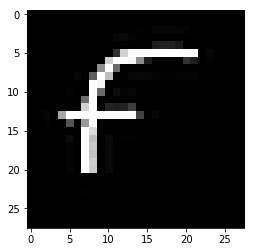

In [19]:
result, confidence = run_prediction(img_emnist.reshape(1,28,28,1))
print('Prediction:', classes[result], ', Confidence:', confidence)
show_img(img_emnist.reshape(1,28,28,1))

# Larger pictures - Sliding window

In [22]:
imgPath = './sample_images/letters_capital.png'

In [23]:
img = Image.open(imgPath).convert('L')

379 265


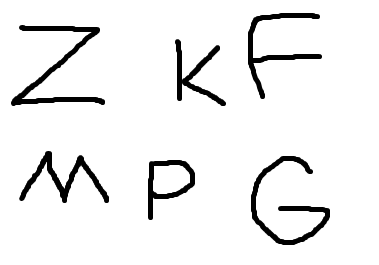

In [24]:
print(img.size[0], img.size[1])
img

## Sliding window

In [25]:
windowSizes = [120, 100, 80]
stride = 20
treshold = 0.9

width = img.size[0]
height = img.size[1]

found = []

for windowSize in windowSizes:
    for y in range(0, int(height) - windowSize + 1, stride):
        for x in range(0, int(width) - windowSize + 1, stride):
            newWindow = img.crop((x, y, x + windowSize, y + windowSize))
            emnistImg = np.array(image_to_emnist(newWindow))

            currLabel, currConfidence = run_prediction(emnistImg.reshape(1,28,28,1))

            if currConfidence > treshold:
                found.append({'char': classes[currLabel], 'conf': currConfidence, 'x': x, 'y': y, 'size': windowSize})

#                 print('X:', x, 'Y:', y, 'Prediction:',classes[currLabel], 'Confidence:', currConfidence)
#                 display(newWindow)



## Pick best detections and sort alphabetically

In [26]:
windows = found
keepWindow = [True] * len(windows)

for i in range(len(windows)):
    for j in range(i+1, len(windows)):
        #Same size
        if windows[i]['size'] == windows[j]['size']:
            #check if distance is less than half
            if abs(windows[i]['x'] - windows[j]['x']) < windows[i]['size'] / 2 and abs(windows[i]['y'] - windows[j]['y']) < windows[i]['size'] / 2:
                if windows[i]['conf'] > windows[j]['conf']:
                    keepWindow[j] = False
                else:
                    keepWindow[i] = False
        #Smaller
        else:
            if abs(windows[i]['x'] - windows[j]['x']) < windows[i]['size'] / 2 and abs(windows[i]['y'] - windows[j]['y']) < windows[i]['size'] / 2:
                keepWindow[j] = False
                
result = []                
for i in range(len(windows)):
    if keepWindow[i]:
        result.append(windows[i]['char'])
        
print(sorted(result))

['F', 'G', 'K', 'M', 'P', 'T', 'Z']


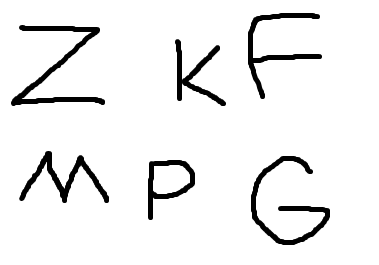

In [27]:
img